### Lars Gabriel, Fabian Wilde, University of Greifswald

# Advanced Python course - Session 1

<hr style="border:1px solid black"> </hr>
<br>
<font size="3">
    This course requires <b>the course participants to have at least basic experience in</b> using the programming language <b>Python</b> and the <b>functional programming paradigm</b>. <br>Therefore, <b>the course participant should be</b> at least <b>familiar with:</b> <br>
<ul>
    <li>handling of builtin Python datatypes: int, float, str, bool, Lists, Dictionaries</li>
    <li>control flow structures like for-/while-loops, if-elif-else statements</li>
    <li>importing and usage of (3rd party) modules</li>
    <li>defining (anonymous) functions with fixed/variable arguments</li>
    <li>running Python scripts on the command-line and handling of command-line arguments
    <li>numpy and matplotlib</li>
</ul>
</font>

## 1. Preparations

<font size="3">
This course uses Jupyter environment from the <b>AppHub</b>. It is a Jupyter notebook environment running on a remote server of the university (which we're using right now). It is accessible from within the university network (being connected to eduroam) or remotely from home via the VPN client. Therefore, a local installation is not necessary.<br>
<div class="alert alert-warning" role="alert">
    <b>If you're connected to eduroam or via the VPN client, you can directly access the JupyterHub via</b>
    <a href="https://apphub.wolke.uni-greifswald.de/">https://apphub.wolke.uni-greifswald.de/</a> using your personal login credentials from the university data center. Then select "Datascience" from "Jupyther".
</div>
In order to use the course materials in your Jupyter notebook instance, open a new empty notebook, type the following statements in the cell and <b>execute it with CTRL + ENTER.</b>
</font>

In [1]:
%%bash
https://github.com/DataCompetency/PythonAdvanced

Cloning into 'pyadv2'...


### Reminder of Keyboard Shortcuts in a JupyterNotebook
<br>

    
| Shortcut | Function |
| -------- | ----------- |
| Esc      | Switch to command mode |
| Enter    | Switch to edit mode |
| B        | Creates new empty cell **B**elow |
| H        | Show **H**elp   |
| X        | Deletes currently selected cell|
| Shift + Enter | Run cell and advance to next cell |
| Ctrl  + Enter | Run cell |
| Ctrl  + S     | Save notebook |

The frame color of the currently selected cell changes from blue in command mode to green in edit mode.

<hr style="border:1px solid gray"> </hr>

## 2. Functions

<font size="3">"<i>Functions are <b>self-contained</b> modules of code that accomplish a specific task. Functions usually <b>take in</b> data, process it, and <b>return</b> a result. Once a function is written, it can be used over and over and over again. Functions can be <b>called</b> from the inside of other functions.</i>" (<a href="https://www.cs.utah.edu/~germain/PPS/Topics/functions.html#:~:text=Functions%20are%20%22self%20contained%22%20modules,the%20inside%20of%20other%20functions">www.cs.utah.edu</a>).<br>    
</font>

<font size="3">
As your code grows bigger and some parts of the code may repeat in it, you'd need to structure it (since you'd also like to avoid <a href="https://en.wikipedia.org/wiki/Spaghetti_code">spaghetti code</a>. This is code which is hard to follow due to various jumps within the code). The first step for cleaner code is to outsource repeating code snippets in user-defined functions. If some repeats itself for at least two times, it is already worth considering to write a function for that.<br><br>
So structuring your code by subdividing it into functions has several advantages, like as<br>
<ul>
    <li><b>readability:</b> code is easier to follow by encapsulating complex code in a simple function call</li>
    <li><b>maintainability:</b> code is easier to maintain, bugs are easier to identify and need only be fixed at one location in your code</li>
    <li><b>portability:</b> parts of your code can be reused in other projects more easily</li>
</ul>
<br>

### 2.1 Argument list
    
</font><center>
    <img src="img/python-function.svg" width="60%">
</center>
<br>


#### Examples

In [5]:
# function with one mandatory and one optional argument
# a default value was set for parameter d
def bar(c, d=0):
    print ("bar(", c, ",", d, ") called")
    
# function call with just one parameter (default value is used for parameter d)
bar(1)
# function call where parameter values are explicitly defined
bar(d=3, c=2)

bar( 1 , 0 ) called
bar( 2 , 3 ) called


In [8]:
# an example for a function definition with a variable number of function arguments
def calc_sum(*args):
    # inside the function, args is a tuple
    print("type(args) = " + str(type(args)))
    result = 0
    for elem in args:
        result += elem
    return result

print("calc_sum(*(1, 2, 3)) = "+str(calc_sum(*(1,2,3))), '\n')  # the function call
print("calc_sum(1, 2, 3) = "+str(calc_sum(1,2,3)), '\n')        # is equivalent to
print("calc_sum(8, 9, 11, 5) = "+str(calc_sum(8, 9, 11, 5)), '\n')        # a different number of arguments can be used

import numpy as np
rand_len = np.random.randint(1,10)
rand_tuple = tuple(np.random.randint(0,10,(rand_len,)))  # but the argument can be a tuple of arbitrary length
print("rand_tuple = "+str(rand_tuple))
print("calc_sum(*rand_tuple) = "+str(calc_sum(*rand_tuple)), '\n')

type(args) = <class 'tuple'>
calc_sum(*(1, 2, 3)) = 6 

type(args) = <class 'tuple'>
calc_sum(1, 2, 3) = 6 

type(args) = <class 'tuple'>
calc_sum(8, 9, 11, 5) = 33 

rand_tuple = (8, 3)
type(args) = <class 'tuple'>
calc_sum(*rand_tuple) = 11 



In [9]:
# an example for a function definition with a variable number of keyword arguments
def get_molecule_name(**kwargs):
    # inside the function, kwargs is a dict
    print("type(kwargs) = "+str(type(kwargs)))
    
    molecules = {'H2O' : 'water', 'C2H5OH' : 'ethanol', 'CH3OH' : 'methanol'}
    
    # assemble string
    out_str = ''
    for key in kwargs.keys():
        if kwargs[key] == 1:
            out_str += key
        else:
            out_str += key + str(kwargs[key])
    
    if out_str in molecules.keys():
        print("The molecule "+out_str+" is known as "+molecules[out_str]+".")
    else:
        print("The molecule "+out_str+" is unknown.")

get_molecule_name(**{})
get_molecule_name(**{'C':2,'H':5,'OH':1})
get_molecule_name(C=2, H=5, OH=1)

type(kwargs) = <class 'dict'>
The molecule  is unknown.
type(kwargs) = <class 'dict'>
The molecule C2H5OH is known as ethanol.
type(kwargs) = <class 'dict'>
The molecule C2H5OH is known as ethanol.


<font size="3"><div class="alert alert-warning"><b>Exercise 2.1:</b> <br>
    Define a function named <i>process_data</i> that takes in two types of arguments:    
    <ul>          
      <li> A function called <i>processor</i>, which should be applied to each element of the <i>data</i> list
      <li> A variable number of integers that are stored in a list called <i>data</i>
    </ul>
    The <i>processor</i> function should take in one argument, an integer, and return a modified version of that integer.<br>
    The <i>process_data</i> function should apply the <i>processor</i> function to each element of the data list, and return a new list containing the processed data.
</div>    
<font size="3">
<b>Try it yourself:</b></font>
</font>


In [ ]:
def process_data(...ADD CODE HERE...):
    ...ADD CODE HERE...

In [14]:
# Solution
def process_data(processor, *data):
    # Apply the processor function to each element of the data list
    processed_data = [processor(num) for num in data]
    return processed_data

In [16]:
# Test your process_data function

# Define a processor function for testing
def double(num):
    return num * 2

# Test case 1
result = process_data(double, 1, 2, 3, 4, 5)
print(result) # Expected output: [2, 4, 6, 8, 10]

# Test case 2
data = [10, 20, 30, 40, 50]
result = process_data(lambda x: x ** 2, *data)
print(result) # Expected output: [100, 400, 900, 1600, 2500]

[2, 4, 6, 8, 10]
[100, 400, 900, 1600, 2500]


### 2.2 Call by sharing
<font size="3">
    Python uses the "call by sharing" mechanism in order to pass arguments to a function. This means that when a function is called, the values of the arguments are not copied, but instead, references to the objects are passed. Any modifications made to the object inside the function can affect the original object outside the function, depending on whether it is a <b>mutable</b> (e.g. lists, dicts) or an <b>immutable</b> (e.g. int, float, string) object. 
</font>

#### Example

In [1]:
def my_func(lst, num, string):
    lst.append(4)
    lst[1] = 9    
    num += 1
    string += " world"
    
a = [1, 2, 3]
b = 5
c = "hello"
my_func(a, b, c)
print(a)      # Output: [1, 9, 3, 4]
print(b)      # Output: 5
print(c)      # Output: "hello"

[1, 9, 3, 4]
5
hello


### 2.3 Namespace

<font size="3">
In Python, a namespace is a mapping from names (i.e., names of variables, functions, classes, etc.) to objects. Namespaces are used to organize and control the scope of names in a program. <br>
    
There are several types of namespaces in Python:
    <ul>
        <li> <b>Built-in Namespace:</b> Contains all built-in functions and types in Python. It is automatically loaded into the interpreter's memory when the Python interpreter starts.
    <li> <b>Global Namespace:</b> Contains all names defined in the outermost level of a module or script. It is created when a module or script is imported or executed, and it is available throughout the entire module or script.
    <li> <b>Local Namespace:</b> Contains all names defined within a function or method. It is created when a function or method is called and is destroyed when the function or method returns.
    </ul>

When Python encounters a name in a program, it looks first in the local namespace first. If the name is not found there, it looks in the global namespace, then the built-in namespace. 
When a variable is assigned a value in a function, Python creates a new name in the local namespace. If the variable has the same name as a variable in the global namespace, the local variable "shadows" the global variable within the function. However, the global variable remains unchanged.
</font>

#### Example

In [2]:
# Built-in namespace
print("Hello, world!")  # `print` is a built-in function

# Global namespace
x = 42
y = 86

def my_func():
    # Local namespace
    y = 12
    z = 13
    print(x, y, z)

my_func()  # prints "42 12 13"
print(x, y)  # prints "42 86"

Hello, world!
42 12 13
42 86


## 3. Generators

<font size="3">
Iterators and generators are powerful features in Python that allow you to iterate over sequences of data, such as lists or dictionaries, or generate sequences of data on-the-fly.

An iterator is an object that allows you to traverse through a collection of data one item at a time, without having to load the entire collection into memory at once. To create an iterator in Python, you define a specific class (we'll get to that later).
A generator, on the other hand, is a special type of iterator that allows you to define a sequence of data on-the-fly, without having to create a separate class. Instead, you use the <i>yield</i> keyword to define a function that generates a sequence of values, one at a time. When the function encounters a yield statement, it temporarily suspends its execution and returns the current value to the caller. The next time the function is called, it resumes execution from where it left off and continues generating the sequence.
    
Benefits of using iterators and generators:
    
<ul>
    <li> <b>Memory Efficiency:</b> Generate data when it is needed without having to store everything in memory at once.
    <li> <b>Time Efficiency:</b> Can start working with the data before the whole data set is loaded into the memory.
</ul>    


In Python, looping and iterators are closely connected. When we loop through objects like lists, dictionaries, and tuples, iterators are automatically used in the background. To manually iterate through a loop, we use the built-in next() function to get the next element of an iterator and the iter() statement to create an iterator object:
<ul>
    <li> <b>iter():</b> Returns an iterator for the given argument, e.g. a list.
    <li> <b>next():</b> Advances the iterator to the next value and returns it.
</ul>   
</font>

#### Example

In [6]:
my_list = [22,33,44]

# Regular for loop:
for i in my_list:
    print(i)
    
print('\n')
    
# We can manually recreate the behavior that 
# occurs in the background of Python's 
# iteration process by using iter() and next()

# create iterator from list
my_iter = iter(my_list)

# iterate through elements of the iterator
print(next(my_iter))
print(next(my_iter))
print(next(my_iter))

22
33
44


22
33
44


### 3.1 Yield statement

<font size="3">
In Python, the <i>yield</i> statement is used to define a generator function that returns an iterator object. The <i>yield</i> statement is similar to the <i>return</i> statement, in that it returns a value from a function. However, while the <i>return</i> statement terminates the function and returns a final value, the <i>yield</i> statement returns a value temporarily and allows the function to continue executing from where it left off.

When a <i>yield</i> statement is encountered in a function, the function is temporarily suspended and the current value is returned to the caller. The next time the function is called, it resumes execution from where it left off and continues generating the sequence of values. This process can be repeated indefinitely, generating a potentially infinite sequence of values.
</font>

#### Example

In [3]:
# A simple generator that can be used to iterate through my_list
def my_generator():
    my_list = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']
    for c in my_list:
        yield c

my_gen = my_generator()
print(next(x))
print(next(x))
print(next(x))
print(next(x))
print(next(x))
print(next(x))
print(next(x))

a
b
c
d
e
f
g


In [5]:
# Generators can also be used to generate an infinite sequence
def even_numbers():
    num = 0
    while True:
        yield num
        num += 2

even_gen = even_numbers()

for _ in range(50):
    print(next(even_gen)) 

0
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
70
72
74
76
78
80
82
84
86
88
90
92
94
96
98


In [8]:
import random

# Generators can also be used to generate random numbers.
# Generators, like normal functions, can accept arguments.
def random_ints(start, stop):
    while True:
        yield random.randint(start, stop)
        
random_gen = random_ints(0, 200)

for _ in range(50):
    print(next(random_gen)) 

12
3
132
24
178
133
7
194
35
82
120
67
182
111
19
105
113
96
39
140
81
176
17
6
139
10
6
163
110
181
119
135
72
9
105
48
192
174
99
168
200
163
126
93
110
72
38
41
39
114


<font size="3"><div class="alert alert-warning"><b>Exercise 3.1:</b> <br>
    Create a generator that generates a sequence of Fibonacci numbers (https://en.wikipedia.org/wiki/Fibonacci_sequence):
    <ul>     
    <li> Start by defining a function called <i>fibonacci()</i> that uses a <i>while</i> loop to generate Fibonacci numbers indefinitely.
    <li> Initialize two variables, a and b, to 0 and 1, respectively. These will be used to generate the Fibonacci sequence.
    <li> Within the loop, use the yield keyword to return the current value of a as the next item in the sequence.
    <li> Calculate the next value of a by adding b to it, and update b to be the previous value of a.
    <li> Test your generator by creating an instance of it and calling the next() function to get the next Fibonacci number in the sequence.
    </ul>          
</div> 
<font size="3">
<b>Try it yourself:</b></font>
</font>


In [ ]:
### ENTER YOUR CODE HERE ###

In [ ]:
# Test your generator
fib_gen = fibonacci()

print(next(fib_gen))  # Output: 0
print(next(fib_gen))  # Output: 1
print(next(fib_gen))  # Output: 1
print(next(fib_gen))  # Output: 2
print(next(fib_gen))  # Output: 3
print(next(fib_gen))  # Output: 5


In [ ]:
# Solution
def fibonacci():
    a, b = 0, 1
    while True:
        yield a
        a, b = b, a + b

<font size="3"><div class="alert alert-warning"><b>Exercise 3.2:</b> <br>
    Create a generator that generates a sequence of prime numbers:
    <ul>
    <li> Start by defining a function called is_prime() that checks whether a given number is prime.
    <li> Define another function called primes() that uses a while loop to generate prime numbers indefinitely.
    <li> Initialize a variable n to 2, which is the first prime number.
    <li> Within the loop, use the yield keyword to return the current value of n as the next prime number in the sequence.
    <li> Increment n by 1 and use a while loop to check if the new value of n is prime. If it is, continue to the next iteration of the outer loop; if it isn't, try the next value of n.
    <li> Test your generator by creating an instance of it and calling the next() function to get the next prime number in the sequence.
    </ul>       
</div> 
<font size="3">
<b>Try it yourself:</b></font>
</font>


In [ ]:
### ENTER YOUR CODE HERE ###

In [11]:
# Test your generator
prime_gen = primes()

print(next(prime_gen))  # Output: 2
print(next(prime_gen))  # Output: 3
print(next(prime_gen))  # Output: 5
print(next(prime_gen))  # Output: 7
print(next(prime_gen))  # Output: 11


2
3
5
7
11


In [10]:
# Solution
def is_prime(n):
    if n < 2:
        return False
    for i in range(2, int(n ** 0.5) + 1):
        if n % i == 0:
            return False
    return True

def primes():
    n = 2
    while True:
        if is_prime(n):
            yield n
        n += 1

### 3.2 Return statement

<font size="3">
Generators can be paused and resumed, allowing them to produce a sequence of values dynamically using the <i>yield</i> keyword. A <i>return</i> statement in a generator function is used to terminate the generator and indicate that there are no more values to be generated. When a <i>return</i> statement is executed in a generator function, a <i>StopIteration</i> exception is raised, which signals to the caller that the generator is finished.
</font>

#### Example

In [24]:
# generator for counting a number down 
# it stops when reaching zero
def countdown(num):
    while num > 0:
        yield num
        num -= 1
    # Message raised with the StopIteration error
    return "Already finished!"

g = countdown(3)

print(next(g))
print(next(g))
print(next(g))

# get the StopIteration error
print(next(g))

3
2
1


StopIteration: Already finished!

### 3.3 Coroutines
<font size="3">
Coroutines are a type of generator that allow for two-way communication between the generator and the caller. They are similar to traditional generators in that they use the yield keyword to pause their execution and return a value to the caller. However, they also provide a way for the caller to send values back to the coroutine using the <b>send()</b> method. In the simplest form, you can  use the yield keyword on the right site of a statement to receive a value from the caller. 
</font> 

#### Example

In [14]:
# very simple coroutine that receives values with send
def my_coroutine():
    while True:
        # keyword yield indicates that the coroutine pauses and waits for a value
        x = yield
        print(f'Received value: {x}')


coro = my_coroutine()
# initialize coroutine
next(coro)
# send values to coroutine that pauses at yield
coro.send(10)
coro.send('Hello, world!')
coro.send([1, 2, 3])

Received value: 10
Received value: Hello, world!
Received value: [1, 2, 3]


<font size="3">  
    For effective use of coroutines in python you can use the <b>async def</b> syntax instead of the regular <b>def</b> syntax. This tells Python that the function is a coroutine that can be paused and resumed, and that it should return a special type of object called a coroutine object instead of a regular function object and allows the usage of the keyword <b>await</b>.
    <ul>
        <li> <b>await:</b> Used in Python to wait for an asynchronous operation to complete. When await is applied to a coroutine object, it suspends the execution of the current coroutine until the awaited coroutine is complete.            
    </ul>
Once you have defined a coroutine, you can create an instance of it using the await keyword, which sends a value to the coroutine and starts its execution. Once the coroutine is running, you can use the send() method to send values to it and resume its execution. The coroutine can then process the value that was sent and return a new value to the caller using the yield keyword.

Coroutines are particularly useful for implementing asynchronous programming in Python using the asyncio module. The asyncio module provides a way to run multiple coroutines concurrently and switch between them when one coroutine is waiting for I/O or some other blocking operation. This allows you to write asynchronous code that is both efficient and easy to understand.
In addition to their use in asynchronous programming, coroutines can also be used for implementing cooperative multitasking, which is a technique for running multiple tasks on a single thread without blocking. This can be useful in situations where you want to maximize CPU utilization or when you are working with limited resources such as embedded systems.

Overall, coroutines provide a powerful way to implement complex and efficient programming patterns in Python, and are an important tool in the modern Python programmer's toolkit.    
</font>

#### Examples

In [19]:
import asyncio

# nest_asyncio is only required in JupyterNotebooks
import nest_asyncio
nest_asyncio.apply()

async def my_coroutine():
    print('Coroutine started')
    # waits until asyncio.sleep finishes
    await asyncio.sleep(1)
    print('Coroutine ended')


# run coroutine with asyncio
asyncio.run(my_coroutine())

Coroutine started
Coroutine ended


In [9]:
## maybe example with send

Enter a number or 'q' to quit:  ö


Invalid input. Please enter a number or 'q' to quit.


Enter a number or 'q' to quit:  45


Generator value is 45


Enter a number or 'q' to quit:  88


Generator value is 88


KeyboardInterrupt: Interrupted by user

In [18]:
import asyncio

# nest_asyncio is only required in JupyterNotebooks
import nest_asyncio
nest_asyncio.apply()

async def print_numbers():
    for i in range(10):
        print(i)
        # waits until asyncio.sleep finishes
        await asyncio.sleep(1)

async def print_letters():
    for letter in 'abcdefghijklmnopqrstuvwxyz':
        print(letter)
        await asyncio.sleep(1)

# main() is the entry point of our application 
# responsible for setting up and executing other coroutines as needed
async def main():
    # iniate coroutines
    task1 = asyncio.create_task(print_numbers())
    task2 = asyncio.create_task(print_letters())
    
    # execute coroutines that 
    await task1
    await task2


asyncio.run(main())


0
a
1
b
2
c
3
d
4
e
5
f
6
g
7
h
8
i
9
j
k
l
m
n
o
p
q
r
s
t
u
v
w
x
y
z


In [15]:
# Coroutines for downloading URLs in parallel

import asyncio
import sys
if not 'aiohttp' in sys.modules:
    !{sys.executable} -m pip install aiohttp
import aiohttp

# nest_asyncio is only required in JupyterNotebooks
import nest_asyncio
nest_asyncio.apply()

async def download_url(url):
    async with aiohttp.ClientSession() as session:
        async with session.get(url) as response:
            html = await response.text()
            return html

async def main(urls):
    coroutines = [download_url(url) for url in urls]
    htmls = await asyncio.gather(*coroutines)
    for url, html in zip(urls, htmls):
        print(f"HTML contents of {url}: {html[:50]}...")

urls = [
    "https://www.google.com",
    "https://www.amazon.com",
    "https://www.github.com",
]

asyncio.run(main(urls))


HTML contents of https://www.google.com: <!doctype html><html itemscope="" itemtype="http:/...
HTML contents of https://www.amazon.com: <!doctype html><html lang="en-us" class="a-no-js" ...
HTML contents of https://www.github.com: 





<!DOCTYPE html>
<html lang="en"  data-a11y-a...


<font size="3">  
    Coroutines are a useful tool in programming for managing concurrent operations and improving performance. Here are some example applications for coroutines:
    <ul>
        <li> Asynchronous programming: Coroutines can be used to improve the performance of asynchronous programming by allowing multiple tasks to run concurrently without blocking the main thread.
        <li> Web scraping: Coroutines can be used to efficiently scrape data from multiple websites simultaneously, reducing the time required to complete the task.
        <li> GUI programming: Coroutines can be used to manage user interactions in graphical user interfaces (GUIs), such as handling user input and updating the interface in response to user actions.
        <li> Game programming: Coroutines can be used to manage game logic and animations, allowing for smoother gameplay and more complex game mechanics.
        <li> Networking: Coroutines can be used to manage network communication, such as sending and receiving data from remote servers.
        <li> Data processing: Coroutines can be used to process large amounts of data efficiently, such as filtering, sorting, and transforming data in real-time.
        <li> Concurrent algorithms: Coroutines can be used to implement concurrent algorithms, such as concurrent sorting or searching algorithms, which can improve performance and reduce response time.          
    </ul>
</font>

<font size="3"><div class="alert alert-warning"><b>Exercise 3.3:</b> <br>
    Suppose you want to simulate a simple game where the player has to guess a randomly generated number between 1 and 100. Write a program that uses coroutines to implement the game.<br>
    Here's some guidance to help you get started:
    <ul>
    <li> Define an async coroutine called <b>generate_number</b> that generates a random number between 1 and 100 and waits for the player's guesses.
    <li> Define another async coroutine called <b>check_guess</b> that takes the player's guess as input, checks if it matches the generated number, and returns a message indicating whether the guess was too high, too low, or correct.
    <li> Define a third async coroutine called <b>main</b> that uses the <b>generate_number</b> coroutine to generate the random number and the <b>check_guess</b> coroutine to check the player's guesses.
    <li> In the main coroutine, use a loop to prompt the player for guesses using the input function, pass each guess to the check_guess coroutine, and print the result.
    <li> When the player guesses the correct number, print a message indicating that the player has won and exit the program.
    </ul>       
</div> 
<font size="3">
<b>Try it yourself:</b></font>
</font>

In [ ]:
# Solution

import asyncio
import random

# nest_asyncio is only required in JupyterNotebooks
import nest_asyncio
nest_asyncio.apply()

async def generate_number():
    number = random.randint(1, 100)
    while True:
        guess = yield
        if guess == number:
            yield "Correct! You win."
            return
        elif guess < number:
            yield "Too low. Guess again: "
        else:
            yield "Too high. Guess again: "

async def main():
    gen = generate_number()
    await gen.asend(None) # Start the coroutine
    while True:
        guess = input("Guess a number between 1 and 100: ")
        try:
            guess = int(guess)
            message = await gen.asend(guess)
            await gen.__anext__()
            print(message)
            if message.startswith("Correct"):
                return
        except ValueError:
            print("Invalid input. Please enter a number.")

asyncio.run(main())


<hr style="border:1px solid gray"> </hr>

## The object-oriented programming (OOP) paradigm

<br>
<div align="center">
    <img src="img/paradigms.jpg" width="66%">
</div>
<br>
<font size="2">
    <i>Source:</i> <a href="https://digitalfellows.commons.gc.cuny.edu/2018/03/12/an-introduction-to-programming-paradigms/"><i>https://digitalfellows.commons.gc.cuny.edu/2018/03/12/an-introduction-to-programming-paradigms/</i></a>
</font>
<br>
<br>
<font size="3">
    <b>Python is a multi-paradigm programming language</b>, hence supporting multiple <a href="https://en.wikipedia.org/wiki/Comparison_of_programming_paradigms">programming paradigms</a>. A programming paradigm is a style, philosophy or a set of principles followed in structuring your code and the way to implement its intended functionality. Among the various paradigms, the <a href="https://en.wikipedia.org/wiki/Functional_programming"><b>functional</b></a> and the <a href="https://en.wikipedia.org/wiki/Object-oriented_programming"><b>object-oriented programming (OOP)</b></a> paradigm are the most popular, also in Python.<br>

<b>The functional paradigm</b> focusses on:
<ul>
<li><b>Structuring your code</b>, so that the program uses subroutine/function calls (executing another program parts from elsewhere during the runtime).
</li>
<li>
<b>Functions</b> in a mathematical sense <b>with arguments and return values</b>.
</li>
<li>
<b>Scoping, the limited visibility of an entity (e.g. the name binding of a variable) is implemented</b>, allowing for <b>local variables</b> and <b>isolation</b>.
</li>
<li>
<b>Functions allowing the reusability</b> of parts of the code since they <b>should ideally work as black boxes</b>.
</li>
<li>
    <b>Statelessness</b>, hence <b>it shouldn't matter when a function is called.</b> As long as the same input is used, the function should yield the same output. <b>Hence functions are only loosely coupled to data</b> outside of their scope.
</li>
</ul>
<br>
A <b>use case</b> is for <b>smaller projects or specialized scripts</b> where <b>new features are rather unlikely to be implemented.</b><br>
Examples for other programming languages following this paradigm are C, Fortran and Cobol.
<br>
<br>
<b>The OOP paradigm</b> focusses on:
<ul>
<li><b>Classes defining objects encapsulating functionality</b> which could also exist independently and can be easily ported to other projects.
</li>
<li>
<b>Class objects posess <i>methods</i></b>, functions bound to the object which should act only on the <b><i>attributes</i></b> of the object. The latter are <b>variables bound to the object instance.</b>
</li>
<li>
<b>The data (its state) is strictly bound to the object.</b>
</li>
<li><b>States</b> since the objects (can) store a state in their attributes. The interaction of these objects with the environment takes place via <b><i>special object methods</i></b>, the so-called <b><i>interfaces</i></b>, to avoid direct manipulation of object attributes from outside <b>ensuring data security.</b> <b>Statefulness implies</b> that the <b>execution order of object methods can matter.</b>
</li>
<li>
<b>Classes grouped in modules</b> so that the objects have the specific environments to work in. This allows <b>easy extensibility</b>.
</li>
<li>
<b>Inheritance</b> allowing for a sub-class to inherit methods and attributes from the parent class.
</li>
<li>
<b>The program functionality is realized by object interactions</b>, hence message passing between the objects. 
</li>
</ul>
<br>
A <b>use case</b> is a <v>big project</b> with <b>many collaborators</b> where the <b>task can be easily subdivided</b>, where <b>statefulness</b> is important and <b>new features are likely to be added.</b>
<br>
Examples for other programming languages following this paradigm are Java, C++, Objective-C, Ruby or VB .NET.<br>
<br>
The different paradigms are partly built on each other. <br><br>Both paradigms implement the <b>DRY</b>-principle (<b>D</b>on't <b>R</b>epeat <b>Y</b>ourself). <br><br> If possible, you always should try to outsource repeating code in functions or classes. <br><br> <b>This does not only improve the maintainability of your code, but also its readability and portability.</b>
</font>
<br>
<br>
<div align="center">
    <img src="img/oops.png" width="50%">
</div>
<br>
<font size="2">
    <i>Source:</i> <a href="https://www.freecodecamp.org/news/what-exactly-is-a-programming-paradigm/"><i>https://www.freecodecamp.org/news/what-exactly-is-a-programming-paradigm/</i></a>
</font>
<br>
<br>
<font size="3">
<b>In summary, the abstract features of object-oriented programming are</b><br>
<ul>
    <li><b>Inheritance:</b> <br>Derivation of class from another class. Hierarchy of classes sharing common attributes and methods. Allows faster development of new features using already existing interfaces.</li><br>
    <li><b>Polymorphism:</b> <br>A function, variable or object can have multiple forms, e.g. the same method could except different number and type of input arguments or the usage of a common interface for objects of different classes.</li><br>
    <li><b>Abstraction:</b><br> A simplified data representation
    </li>
    <br>
    <li><b>Encapsulation:</b><br> Bundling data and methods to hide the internal state and mechanics of an object from the outside. Ensures data safety, portability and maintainability.</li>
</ul>
</font>

### Classes, Objects & Attributes
<br>
<div align="center">
    <img src="img/yoda_meme.png" width="40%">
</div>
<br>
<font size="2">
    <i>Source:</i> <a href="https://medium.com/@972LPV/mutable-vs-immutable-objects-in-python-a8a3439636b6"><i>https://medium.com/@972LPV/mutable-vs-immutable-objects-in-python-a8a3439636b6</i></a>
</font>
<br>
<br>
<font size="3">
    <b>Classes are blueprints or templates for objects in Python defining the object <i>properties via attributes</i> and <i>behavior via methods</i>.</b><br>
In Python, even the basic builtin datatypes like int, float or str, are objects of a class in the end. Even references to functions. In Python, every entity is and can be treated as object.<br>

### Example:

In [14]:
# example int
int_var = 3
# example str
str_var = "Hello world!"
# example float
float_var = 3.141
# example tuple
tuple_var = (1,2,3)
# example list
list_var = [1,2,3]
# example dict
dict_var = {'a':1,'b':2,'c':3}
# example lambda/anonymous function
func_var = lambda x: x**2
# example "regular" function
def foo(bar):
    return bar**2

# print types of the variables
print("type(int_var)="+str(type(int_var)))
print("type(str_var)="+str(type(str_var)))
print("type(float_var)="+str(type(float_var)))
print("type(tuple_var)="+str(type(tuple_var)))
print("type(list_var)="+str(type(list_var)))
print("type(dict_var)="+str(type(dict_var)))
print("type(func_var)="+str(type(func_var)))
print("type(foo)="+str(type(foo)))

type(int_var)=<class 'int'>
type(str_var)=<class 'str'>
type(float_var)=<class 'float'>
type(tuple_var)=<class 'tuple'>
type(list_var)=<class 'list'>
type(dict_var)=<class 'dict'>
type(func_var)=<class 'function'>
type(foo)=<class 'function'>


<font size="4">
<b>A class definition in Python has the following syntax:</b><br><br>
</font>
<font size="3">
<b>class <i>ClassName</i>(<i>ParentClass</i>):</b><br>
<p style="margin-left: 20px"><b>def __init__(self, <i>arguments</i>):</b></p>
<p style="margin-left: 40px"><font face="Courier">self.<i>public_attr</i> = <i>value</i></font></p>
<p style="margin-left: 40px"><font face="Courier">self.<i>_protected_attr</i> = <i>value</i></font></p>
<p style="margin-left: 40px"><font face="Courier">self.<i>__private_attr</i> = <i>value</i></font></p>
<p style="margin-left: 40px"><font face="Courier">indented code block</font></p>
<p style="margin-left: 40px"><b>[return <b><i>value</i>]</b></p>

<p style="margin-left: 20px"><b>def public_method(self, <i>arguments</i>):</b></p>
<p style="margin-left: 40px"><font face="Courier">indented code block</font></p>
<p style="margin-left: 40px"><b>[return <b><i>value</i>]</b></p>

<p style="margin-left: 20px"><b>def _protected_method(self, <i>arguments</i>):</b></p>
<p style="margin-left: 40px"><font face="Courier">indented code block</font></p>
<p style="margin-left: 40px"><b>[return <b><i>value</i>]</b></p>

<p style="margin-left: 20px"><b>def __private_method(self, <i>arguments</i>):</b></p>
<p style="margin-left: 40px"><font face="Courier">indented code block</font><br>
<b>[return <b><i>value</i>]</b></p>
<br><br>
    
<b>where the private, builtin method <i>__init__</i> is the so-called <i>constructor</i> of the class object which is invoked when a new class object is <i>instantiated</i> (created).</b><br>
<b>A function or method does not need to return a value. If no return statement is present, a NoneType object will be returned. However, the function or method needs to contain at least one statement (or a <i>pass</i>).</b><br><br>   
<b>The class naming convention is to start with a capital letter and may use only here camel case, hence the alternating use of small and capital letters to create seperation, e.g. ClassName.</b><br><br>
<br>
<font size="4">
<u><b>Attribute and Method Naming Convention:</b></u>
</font>
<font size="3">
<br>
<br>
<b>Methods or attributes</b>
<ul>
    <li><b>without leading underscore</b> as name prefix are <b>public.</b></li>
    <li><b>with one leading underscore</b> as name prefix are <b>protected.</b></li>
    <li><b>with two leading underscores</b> as name prefix are <b>private.</b></li>
    <li><b>with two underscores as</b> name <b>prefix and suffix</b> are <b>private, built-in methods.</b></li>
</ul>
<b>In contrast to other programming languages, this is <u>just a notational convention</u> and by no means a real access protection!</b><br>
<b>Protected and private methods and protected attributes can be accessed anyway!</b><br> Private attribute access is possible using the built-in dictionary representation of an object: <i>obj.__dict__[attribute_name]</i>.<br><br>
<b>When you attempt to access a private attribute, an error is thrown, but it can be accessed anyway with a trick.</b>
</font>

### Example:

In [30]:
# class definition
# the class "Dog" inherits from class "object"
# every class inherits from that class as default
# naming convention for class names is to start with a capital letter
class Dog(object):
    
    # the constructor of the class
    # a private, built-in method
    def __init__(self, name, age):
        # a private attrbute which should be changed from outside the object
        self.__name = name
        self._age = age
        self.favorite_food = "Pizza"
        self.favorite_toy = "Bone"
        self.has = None
        self.__energy = 5
        
    # overload the builtin method __str__ 
    # for an implicit string representation of the object
    #def __str__(self):
    #    return "This is the dog "+self.__name+". I am "+str(self._age)+" years old."
        
    # a public class method
    def bark(self, volume, pitch, duration):
        # assemble string
        bark_str_prefix = ["bo","ba","bi"]
        bark_str_letter = ["o","a","i"]
        bark_str_suffix = "rk"
        bark_str = bark_str_prefix[pitch]
        bark_str += bark_str_letter[pitch]*duration
        bark_str += bark_str_suffix
        if volume > 50:
            bark_str = str.upper(bark_str)
            
        if self.__energy <= 0:
            return self.__sleep()
        else:
            self.__energy -= 1
            return bark_str
    
    # a public class method
    # implements an interaction between the objects of class Dog and Ball
    def bite(self, obj):
        if isinstance(obj, Ball):
            obj.deflate()
    
    # a public class method
    def retrieve(self, obj):
        self.has = obj
        return obj
    
    # a private class method - method name starts with two underscores
    def __sleep(self):
        self.__energy = 5
        return "zZzZ"
    
    # setter - method to set private attribute content
    def set_name(self, new_name):
        self.__name = new_name
    
    # getter - method which yields private attribute content
    def get_name(self):
        return self.__name
    
    # getter - method which yields private attribute content
    def get_energy(self):
        return self.__energy

# another class definition
class Ball(object):
    def __init__(self, size, color, weight, inflated):
        self.__color = color
        self.__size = size
        self.__weight = weight
        self.__inflated = inflated
        
    # setter - method to set private attribute content
    def deflate(self):
        self.__inflated = False

    # setter - method to set private attribute content
    def inflate(self):
        self.__inflated = True
        
    # setter - method to set private attribute content
    def set_inflated(self, value):
        self.__inflated = value

    # getter - method which yields private attribute content
    def is_inflated(self):
        return self.__inflated
    
    def print_status(self):
        out_str = "The ball is "+self.__color+" and "+str(self.__size)+\
                    " m big and weights "+str(self.__weight)+" kg and is "
        if self.__inflated:
            out_str += "inflated."
        else:
            out_str += "not inflated."
        print(out_str)
        return out_str

# instantiate new "Dog" objects
dog1 = Dog("Bello", 0)
dog2 = Dog("Doggo", 2)
# instantiate new "Ball" object
ball1 = Ball(0.3, "red", 0.2, True)

# print types
print("Object types:")
print("type(dog1)="+str(type(dog1)))
print("type(dog2)="+str(type(dog2)))
print("type(ball1)="+str(type(ball1))+"\n")

# attempt to print Dog-objects
# results in standard string representation for generic objects
# since we have not overloaded the built-in method __str__
# which takes care of the conversion of the object to a string representation
print("Objects implicitly converted to strings:")
print(dog1)
print(dog2)
print(ball1)
print("")

Object types:
type(dog1)=<class '__main__.Dog'>
type(dog2)=<class '__main__.Dog'>
type(ball1)=<class '__main__.Ball'>

Objects implicitly converted to strings:



<font size="3">
When you attempt to print objects of user-defined classes, Python tries to implicitly convert these objects to a string representation.<br><br>
<b>Since <i>Dog</i> and <i>Ball</i> are user-defined classes, Python cannot know what an adequate string representation of that object would be. Therefore, an object is converted to a string of that form as default.</b><br><br>
We can invoke public object methods without any problem. An object method can change attributes of the object, hence an object can have a certain state.
</font>

In [113]:
# invoke public object methods
print("Results of invoked object methods:")
print("----------------------------\n")
print("dog1.bark(40, 0, 1) = "+str(dog1.bark(40, 0, 1)))
print("dog1.bark(50, 1, 1) = "+str(dog1.bark(50, 1, 1)))
print("dog1.bark(60, 1, 1) = "+str(dog1.bark(60, 1, 1)))
print("dog1.bark(60, 1, 10) = "+str(dog1.bark(60, 1, 10)))
print("dog1.retrieve(ball1) = "+str(dog1.retrieve(ball1)))
ball1.print_status()
print("")

# invoke method which modifies the objects attributes
print("ball1.is_inflated() = "+str(ball1.is_inflated()))
print("After invoking ball1.deflate():")
ball1.deflate()
print("ball1.is_inflated() = "+str(ball1.is_inflated()))
print("")

Results of invoked object methods:
----------------------------

dog1.bark(40, 0, 1) = boork
dog1.bark(50, 1, 1) = baark
dog1.bark(60, 1, 1) = BAARK
dog1.bark(60, 1, 10) = BAAAAAAAAAAARK
dog1.retrieve(ball1) = <__main__.Ball object at 0x7f17a37bd0f0>
The ball is red and 0.3 m big and weights 0.2 kg and is inflated.

ball1.is_inflated() = True
After invoking ball1.deflate():
ball1.is_inflated() = False



<font size="3">
The statefullness of objects in Python is also demonstrated by interaction between different object types.<br>
<b>In this example, an object of class Dog invokes a method of another object of a different class, here Ball.</b>
</font>

In [114]:
print("Statefullness of objects:")
print("-------------------------")
print("If method bark() was invoked 5 times (not necessarily sequentially),")
print("the private method __sleep() of the Dog object is invoked.")
print("dog1.get_energy() = "+str(dog1.get_energy()))
print("dog1.bark(100,1,20) = "+str(dog1.bark(100,1,20)))
print("dog1.get_energy() = "+str(dog1.get_energy()))
print("dog1.bark(100,1,20) = "+str(dog1.bark(100,1,20)))
print("dog1.get_energy() = "+str(dog1.get_energy()))
print("")

# interaction between an object of class Dog and of class Ball
print("Interaction between objects:")
print("----------------------------\n")
print("After invoking ball1.inflate():")
ball1.inflate()
print("ball1.is_inflated() = "+str(ball1.is_inflated()))
print("After invoking dog1.bite(ball1):")
dog1.bite(ball1)
print("ball1.is_inflated() = "+str(ball1.is_inflated()))

print("")

# access public object attribute directly
print("dog1.has = "+str(dog1.has))
print("\n")

# attempt to access private object attribute (discouraged anyway, use setter/getter methods instead !)
print("Attempt to access private attribute throws an error (encapsulation):")
print("dog1.__name = "+str(dog1.__name))
# yields an AttributeError

Statefullness of objects:
-------------------------
If method bark() was invoked 5 times (not necessarily sequentially),
the private method __sleep() of the Dog object is invoked.
dog1.get_energy() = 1
dog1.bark(100,1,20) = BAAAAAAAAAAAAAAAAAAAAARK
dog1.get_energy() = 0
dog1.bark(100,1,20) = zZzZ
dog1.get_energy() = 5

Interaction between objects:
----------------------------

After invoking ball1.inflate():
ball1.is_inflated() = True
After invoking dog1.bite(ball1):
ball1.is_inflated() = False

dog1.has = <__main__.Ball object at 0x7f17a37bd0f0>


Attempt to access private attribute throws an error (encapsulation):


AttributeError: 'Dog' object has no attribute '__name'

In [95]:
# attempt to invoke private object method
print("Attempt to invoke private method throws an error (encapsulation):")
print("dog1.__sleep()="+dog1.__sleep())

Attempt to invoke private method throws an error (encapsulation):


AttributeError: 'Dog' object has no attribute '__sleep'

<font size="3"><div class="alert alert-warning"><b>Exercise:</b>
    Define a class <i>Sheep</i> with <b>private</b> attributes <i>color, name, age, sheared</i> and the <b>public</b> attribute <i>id</i>. Implement <b>setters</b> and <b>getters</b> for the private attributes. Implement a <b>public</b> method <i>shear</i> switching the private attribute <i>sheared</i>. Implement a method <i>_ _str _ _</i> for the implicit string representation of the object, so that Python knows what to do when you attempt to print a Sheep object. Then try to print the Sheep object. </div><br>
<b>Try it yourself:</b></font>

### Decorators (in general)
<br>
<font size="3">
    <b><a href="https://wiki.python.org/moin/PythonDecorators">Decorators</a> help to wrap functions around functions or class methods with a shorter notation, the so-called <i>syntactic sugar</i>, using the @-symbol.</b><br><br>
This notation is often used in 3rd party packages e.g. for debugging or code runtime analysis. A popular package to measure the runtime of a function call or an algorithm is <i>timeit</i>. But it is also frequently used in frameworks like Django or Flask for Full-Stack Python where Python-based web applications are developed to denote event callback functions.
</font>

### Example:

In [313]:
def my_decorator(func):
    def wrapper():
        print("Something is happening before the function is called.")
        func()
        print("Something is happening after the function is called.")
    return wrapper

@my_decorator
# @my_decorator is just an easier way of saying say_whee = my_decorator(say_whee)
def say_whee():
    print("Whee!")
    
say_whee()

Something is happening before the function is called.
Whee!
Something is happening after the function is called.


In [316]:
import time
import numpy as np

def benchmark(func):
    def wrapper():
        t1 = time.time()
        func()
        delta_t = time.time() - t1
        print(str(np.round(delta_t,6))+" seconds passed.")
    return wrapper

@benchmark
def something_intensive():
    print("zZzZzZ")
    time.sleep(2)
    
something_intensive()

zZzZzZ
2.00157 seconds passed.


<font size="3">
    <b>So the decorator <i>benchmark()</i> just wraps around the function <i>something_intensive()</i>, so that <i>benchmark(something_intensive())</i> is invoked in the end.</b>
</font>

### Decorators with arguments
<br>
<font size="3">
In Python it's also possible to define decorators with arguments and even use multiple decorators with the same function or class method. 
</font>

### Example:

In [37]:
import time

def print_delayed(delay = 1):
    def decorator(function):
        def wrapper(*args, **kwargs):
            out = function(*args, **kwargs)
            for n in range(len(out)+1):
                print(out[:n]+"\r")
                time.sleep(delay)
        return wrapper
    return decorator

@print_delayed(delay = 0.25)
def greeting(name):
    return "Hello, "+name+" !"
    
print(greeting("John Doe"))


H
He
Hel
Hell
Hello
Hello,
Hello, 
Hello, J
Hello, Jo
Hello, Joh
Hello, John
Hello, John 
Hello, John D
Hello, John Do
Hello, John Doe
Hello, John Doe 
Hello, John Doe !
None


### Built-in Decorators
<br>

<font size="3">
    A popular built-in decorator in Python is the <b><i>@property</b></i> decorator. <br>
    <b>It makes a class method accessible as if it would be an attribute of the class object.</b>
</font>

### Example:

In [11]:
class Student:
    def __init__(self, name, grades):
        self.name = name
        self.grades = grades

    @property
    def got_grades(self):
        return self.name + ' achieved ' + self.grades + ' points'
    
s = Student("Anna", "23")
print(s.name)
print(s.grades)
# the class object method was invoked 
# by accessing the object attribute of the same name
print(s.got_grades)

# we should avoid setting object attributes from outside the object
s.name = "John"
print(s.name)
# the class object method was invoked 
# by accessing the object attribute of the same name
print(s.got_grades)

Anna
23
Anna achieved 23 points
John
John achieved 23 points


<font size="3">
<b>Of course, it should be avoided to set object attributes from outside the object (violation of the encapsulation)!</b><br><br>
Above, the implementation of object attribute setters and getters was introduced.<br><br><b>Decorators offer a more elegant way to implement these using the syntax:<br><br> <i>@method_name.setter</i>, <i>@method_name.deleter</i> or <i>@method_name.getter</i></b><br><br>
<b>No new additional method name is introduced this way and value/type checks can be easily implemented.</b>
</font>

### Example:

In [27]:
class Student:
    def __init__(self, name, grades):
        self.name = name
        self.grades = grades

    @property
    # this is in fact an attribute getter
    # this method wraps around it
    def got_grades(self):
        return self.name + ' achieved ' + self.grades + ' points'
    
    @got_grades.setter
    # this method is wrapper
    # it is invoked when you assign a value to the attribute / property
    def got_grades(self, sentence):
        name, rand, grades = sentence.split(' ')
        self.name = name
        self.grades = grades
    
# creates new object of class Student
s = Student("Anna", "23")
print(s.name)
print(s.grades)
# the class object method was invoked 
# by accessing the object attribute of the same name
print(s.got_grades)

# we should avoid setting object attributes from outside the object
s.name = "John"
print(s.name)
# the class object method was invoked 
# by accessing the object attribute of the same name
print(s.got_grades)

# instead we use now the property setter defined by the decorator @got_grades.setter
# the setter method is invoked when you try to assign a value to the property
# no new method name is introduced this way !
s.got_grades = 'Richard achieved 31'
print(s.got_grades)
print(s.name)
print(s.grades)

Anna
23
Anna achieved 23 points
John
John achieved 23 points
Richard achieved 31 points
Richard
31


### Inheritance & Method prototyping, overriding and overloading
<br>
<font size="3">
    <b>Inheritance is one of the key features of the OOP paradigm.</b><br><br>
    <b>Inheritance allows a child-class or subclass to inherit attributes and methods from one or more parent- or super classes.</b> The figure illustrates this circumstance:<br><br>
    
</font>
<div align="center">
<img src="img/inheritance2.jpg" width="40%">
</div>
<br>
<font size="2"><i>Source: </i><a href="https://www.startertutorials.com/blog/inheritance-polymorphism-python.html">https://www.startertutorials.com/blog/inheritance-polymorphism-python.html</a></font><font size="3">
<br><br>

Inheritance allows to define a hierarchy of classes sharing the same base attributes and methods (interfaces). It can facilitate the implementation of new features in your code.<br><br> Inheritance is very often required when you work with big Python frameworks like the machine learning frameworks PyTorch or Tensorflow. There you write your own class by inheriting from a provided (abstract) class to comply with the interfaces or methods expected by the framework environment.<br><br>
    <b>Multiple inheritance</b> is possible in Python, but only indirect via <a href="https://medium.com/@__hungrywolf/mro-in-python-3-e2bcd2bd6851"><b>Method Resolution Order</b> (MRO)</a>, hence the object method are called in a specific order. An example is given below. <br><br>
<b>In particular, method prototyping, overriding and overloading is applied in that case.<br><br>
Method prototypes are simply empty methods defined in the parent class, hence this class is called <i>abstract</i>. <br><br>This prototype method is then overridden by redefining a method with the <u>same name</u> in the sub class.</b><br><br>
    <b>Method overloading</b> is also called <b><i>polymorphism</i></b> since multiple class methods of the <u>same name</u> can be defined, but accepting different numbers of arguments and types. Depending on which <i>signature</i> (number and data types of expected method arguments) of the method fits, the specific method in that case is selected and executed.<br><br>
<b>In contrast to other programming languages like e.g. Java, a builtin implementation of polymorphism is not available in Python, hence it is not possible to define multiple methods of the same name, but accepting different number of arguments.</b> Polymorphism can only be implemented indirectly by default values for (keyword) arguments or variable number of arguments.
</font>

### Example:

In [34]:
# let's use our class Dog from the example above
# define a new class defining a special type of Dog
class InuShiba(Dog):
    
    # the constructor of the class Dog is overridden here
    def __init__(self, name, num_of_memes_published, age):
        
        # in order to have the same attributes like the parent or super class Dog
        # invoke constructor of super class, then define additional attributes
        
        # instead of using the explicit class name here, better use the super() method!
        super().__init__(name, age)
        #Dog.__init__(self, name, age)
        self.__num_of_memes_published = num_of_memes_published
    
    # a new method only InuShiba objects have
    def publish_meme(self):
        self.__num_of_memes_published += 1
        
    # the method bark is overloaded, since the class Dog already has a method bark, but
    # with a different signature: the bark method of Dog expects 3 parameters, this bark method does not.
    def bark(self, volume=100, pitch=1, duration=10):
        return "Barking in Japanese."

special_dog = InuShiba("Hideki", 2E100, 99)
# inspecting the attributes of a InuShiba object, it in fact shares the same attributes as a Dog object
# but it has additional attributes
print(special_dog.__dict__)
# inspecting the methods of a InuShiba object, it shares in fact the same methods as a Dog object
# but it has additional methods
print(special_dog.__dir__())

# demonstration of method overloading / polymorphic methods
print(special_dog.bark())
print(special_dog.bark(100, 1, 10))
print("")

print(Dog("a",1) == Dog("b",1))
# need to override __add__ to do that
#print(Dog("a",1) + Dog("b",2))
print(dog1.bark(100,1,10))
# invoking bark of a Dog object, throws an exception when invoked without parameters
dog1.bark()

{'_Dog__name': 'Hideki', '_age': 99, 'favorite_food': 'Pizza', 'favorite_toy': 'Bone', 'has': None, '_Dog__energy': 5, '_InuShiba__num_of_memes_published': 2e+100}
['_Dog__name', '_age', 'favorite_food', 'favorite_toy', 'has', '_Dog__energy', '_InuShiba__num_of_memes_published', '__module__', '__init__', 'publish_meme', 'bark', '__doc__', 'bite', 'retrieve', '_Dog__sleep', 'set_name', 'get_name', 'get_energy', '__dict__', '__weakref__', '__repr__', '__hash__', '__str__', '__getattribute__', '__setattr__', '__delattr__', '__lt__', '__le__', '__eq__', '__ne__', '__gt__', '__ge__', '__new__', '__reduce_ex__', '__reduce__', '__subclasshook__', '__init_subclass__', '__format__', '__sizeof__', '__dir__', '__class__']
Barking in Japanese.
Barking in Japanese.

False
BAAAAAAAAAAARK


TypeError: bark() missing 3 required positional arguments: 'volume', 'pitch', and 'duration'

In [360]:
# Demonstration of built-in polymorphic functions 
  
# len() being used for a string 
print(len("geeks")) 
  
# len() being used for a list 
print(len([10, 20, 30])) 

def add(x, z = 0):  
    return x + y + z 
  
# Function polymorphism / overloading due to defined default values for function arguments
print(add(2, 3)) 
print(add(2, 3, 4))

5
3


<font size="3"><div class="alert alert-warning"><b>Exercise:</b> Write a base class <i>Mammal</i> with private properties (attributes) weight, height, food. Define the method prototypes <i>talk</i> and <i>walk</i> by simply defining empty methods (by using the keyword <b>pass</b> after the method definition). Then define a child class <i>Sheep</i> to inherit from the class <i>Mammal</i> and override the prototypes defined in the parent class. </div>

<b>Try it yourself:</b></font>

### Multiple Inheritance and Method Resolution Order (MRO)
<br>
<div align="center">
<img src="img/mro.png" width="50%">
</div>
<br>
<font size="2">
    <i>Source: </i><a href="https://medium.com/@__hungrywolf/mro-in-python-3-e2bcd2bd6851">https://medium.com/@__hungrywolf/mro-in-python-3-e2bcd2bd6851</a>
</font>
<br><br>

<br>
<font size="3">
Multiple inheritance can lead to ambigous situations like the famous diamond problem as illustrated above and shown as code below.<br><b> It is unclear in this case in which order the subclass would inherit the attributes and methods of its parent classes.</b> Therefore an algorithm, the <a href="https://en.wikipedia.org/wiki/C3_linearization">C3 linearization</a>, is used to determine the order of inheritance in presence of mulitple inheritance.<br><br>
<b>In simple words, the super class constructors are invoked in the inheritance order from left to right.</b>
</font>



### Example:

In [42]:
class A(object):
    def __init__(self):
        print('class A')
        
class B(object):
    def __init__(self):
        print('class B')
        
class C(A, B):
    def __init__(self):
        print('class C')
        super().__init__()
        
# create a new object of class C
obj1 = C()
# print the method resolution order of the class
C.mro()

class C
class A


[__main__.C, __main__.A, __main__.B, object]

<font size="3">
<b>The need for an algorithm to determine the MRO is more obvious in case of a more complex, hybrid inheritance as shown below as figure and code.</b>
</font>
<br>
<div align="center">
<img src="img/mro2.png" width="25%">
</div>
<br>
<font size="2"><i>Source: </i> <a href="https://medium.com/@__hungrywolf/mro-in-python-3-e2bcd2bd6851">https://medium.com/@__hungrywolf/mro-in-python-3-e2bcd2bd6851</a></font>

### Example:

In [47]:
class O: pass

class F(O):pass

class E(O):pass

class D(O):pass

class C(D,F):pass

class B(D,E):pass

class A(B,C):pass

obj = A()
# print the method resolution order of class A
print(A.mro())

[<class '__main__.A'>, <class '__main__.B'>, <class '__main__.C'>, <class '__main__.D'>, <class '__main__.E'>, <class '__main__.F'>, <class '__main__.O'>, <class 'object'>]


### Useful builtin functions and inspect
<br>
<font size="3">
In particular when dealing with arbitrary Python objects and when we have no code documentation available, some builtin Python functions can be very useful.<br><br>
<b>Builtin Python functions are usually private and end with a double underscore character.</b><br><br>
    <b>We can list all methods and builtin methods of an object by invoking the <i>obj._ _dir_ _()</i> method</b><br>
    There, we find again the builtin method <b><i>_ _str_ _</i></b> for the string representation of an object which we can overload.<br>
We already did it in fact in the definition of the classes Dog and Ball.
</font>

### Example:

In [317]:
dog1.__dir__()

['_Dog__name',
 '_age',
 'favorite_food',
 'favorite_toy',
 'has',
 '_Dog__energy',
 '__module__',
 '__init__',
 'bark',
 'bite',
 'retrieve',
 '_Dog__sleep',
 'set_name',
 'get_name',
 'get_energy',
 '__dict__',
 '__weakref__',
 '__doc__',
 '__repr__',
 '__hash__',
 '__str__',
 '__getattribute__',
 '__setattr__',
 '__delattr__',
 '__lt__',
 '__le__',
 '__eq__',
 '__ne__',
 '__gt__',
 '__ge__',
 '__new__',
 '__reduce_ex__',
 '__reduce__',
 '__subclasshook__',
 '__init_subclass__',
 '__format__',
 '__sizeof__',
 '__dir__',
 '__class__']

<font size="3">
We can get all attributes of an object by accessing its Dictionary representation with the builtin private attribute <b><i>_ _dict_ _</b></i>.
</font>

In [48]:
print(dog1.favorite_food)
print(dog1.__dict__['favorite_food'])
print(dog1.__dict__)

Pizza
Pizza
{'_Dog__name': 'Bello', '_age': 0, 'favorite_food': 'Pizza', 'favorite_toy': 'Bone', 'has': None, '_Dog__energy': 3}


<font size="3">
Sometimes in case of errors when we try to debug our code, it can be useful to find out the location path of a module or to check its version. So we can check if the right module (version) was imported in our code.
</font>

In [338]:
import numpy as np
print(np.__path__)
print(np.__version__)

['/home/mru/.local/lib/python3.6/site-packages/numpy']
1.18.5


<font size="3">In order to get a quick help how to use a certain module or function, you can print the <b><i>docstring or documentation string</i></b> of a function, if implemented, using the built-in private attribute <i><b> _  _ doc _  _ </b></i>.</font>

In [51]:
import numpy as np
print(np.__doc__)


NumPy
=====

Provides
  1. An array object of arbitrary homogeneous items
  2. Fast mathematical operations over arrays
  3. Linear Algebra, Fourier Transforms, Random Number Generation

How to use the documentation
----------------------------
Documentation is available in two forms: docstrings provided
with the code, and a loose standing reference guide, available from
`the NumPy homepage <https://www.scipy.org>`_.

We recommend exploring the docstrings using
`IPython <https://ipython.org>`_, an advanced Python shell with
TAB-completion and introspection capabilities.  See below for further
instructions.

The docstring examples assume that `numpy` has been imported as `np`::

  >>> import numpy as np

Code snippets are indicated by three greater-than signs::

  >>> x = 42
  >>> x = x + 1

Use the built-in ``help`` function to view a function's docstring::

  >>> help(np.sort)
  ... # doctest: +SKIP

For some objects, ``np.info(obj)`` may provide additional help.  This is
particularl

<font size="3">
    <b>For diagnostic purposes, there exists the package <a href="https://docs.python.org/3/library/inspect.html"><i>inspect</i></a> to analyze Python functions or class methods.</b>
</font>

<font size="3"><div class="alert alert-warning"><b>Exercise:</b> Create a new numpy array and discover its methods and attributes without using the documentation. Analyze a method of your choice with the package <i>inspect</i> to find out which parameters this method expects.</div>

<b>Try it yourself:</b></font>

## Recursion
<br>
<font size="3">
    <b>A recursive function is a function which invokes itself</b> to accomplish the task. Examples are recursive series in mathematics and tree or directory discovery algorithms. If not implemented carefully, infinite recursive loops can ocurr causing the program to freeze.
</font>

### Example:

In [9]:
# a recursive version of the built-in Python function len()
a = [1, 2, 3]
b = [8, 2, a, 0, -1]
nested_list = [[b, 0, 2, 1]]

# print result of len(nested_list)
print("len(nested_list)="+str(len(nested_list)))

# define recursive len to get total number of elements in nested tuple
def recursive_len(t):
    if isinstance(t, list):
        count = 0
        for elem in t:
            if isinstance(elem, list):
                count += recursive_len(elem)
            else:
                count += 1
        return count
    else:
        return 1

# but total number of elements in nested tuple is
print("(recursive) element count in nested_list: "+str(recursive_len(nested_list)))

len(nested_list)=1
(recursive) element count in nested_list: 10


<font size="3"><div class="alert alert-warning"><b>Exercise:</b> Implement the recursive <a href="https://en.wikipedia.org/wiki/Fibonacci_number">Fibonacci series</a>: <br>
<div align="center">
$\mathrm{F_0 = 0, F_1 = 1}$<br>
$\mathrm{F_n = F_{n-1} + F_{n-2}}$
</div>
as recursive function.
</div>

<b>Try it yourself:</b></font>

## Exceptions
<br>
<font size="3">
You've surely already experienced when an exception was raised or in other words an error was thrown. For example, when we try to divide by zero or access a non-existant list element:
</font>

In [288]:
1 / 0

ZeroDivisionError: division by zero

In [287]:
foo = [1, 2, 3]
foo[10]

IndexError: list index out of range

<font size="3">
<b>Normally, the program execution is terminated whenever an exception is raised.</b><br><br>
    <b>But Python offers the <i>try..except..finally</i> statement to <i>catch</i> an exception during the runtime.</b><br> A possible use case could be to gracefully terminate a running program by saving the program state before it is terminated.<br><br>
You can also raise exceptions on purpose in your code by using the keyword <b><i>raise</i><b> followed by an <b><i>Exception</i><b> object.
</font>

### Example:

In [312]:
#user_input = [1, 0]
user_input = [1, None]

try:
    # code block in which any or a specific Exception should be catched
    result = user_input[0] / user_input[1]
except ZeroDivisionError:
    print("A division by zero was attempted. Terminating gracefully...")
except TypeError:
    print("A type error occurred. Terminating gracefully...")
except Exception:
    # what do to in case of an exception
    print("A general exception occurred.")
finally:
    # after exception has been catched
    print("Done.")
    

A type error occurred. Terminating gracefully...
Done.


In [291]:
print(type(TypeError("This is a test.")))

raise TypeError("This is a test.")

<class 'TypeError'>


TypeError: This is a test.

<font size="3"><div class="alert alert-warning"><b>Exercise:</b>Implement object/data type checks for the methods of the class Dog from above. Make sure this way that the method argument is e.g. a numerical value or string according to what is saved in the attributes.<br><br>
    <b>Hint: </b><br> Checkout the Python documentation about <a href="https://docs.python.org/3/library/exceptions.html">builtin exceptions</a>.</div>

<b>Try it yourself:</b></font>

## Parallelism
<br>
<font size="3">
So far, you only had created Python code where the program is run in a sequential manner, executing every statement one after another (serial processing). But sometimes, your problem could be easily parallelized, profit from a multi-core CPU and the required computational time could be significantly reduced (parallel processing).<br><br>The figure below illustrates the difference between serial (sequential) and parallel execution:<br><br>
<div align="center">
<img src="img/serial_vs_parallel.png" width="80%">
</div>
<br>
<font size="2">
    <i>Source:</i> <a href="https://sebastianraschka.com/Articles/2014_multiprocessing.html"><i>https://sebastianraschka.com/Articles/2014_multiprocessing.html</i></a>
</font>
<br>
<br>
    
<b>In all programming languages in general, but in Python in particular, there exist two options to realize concurrent code execution, hence the parallelization of the code: multiple threads or multiple processes.</b>
</font>

### Processes and Threads
<br>
<font size="3">
<b>A <a href="https://en.wikipedia.org/wiki/Process_(computing)">process</a> is an instance of a computer program being executed.</b> The same program can be run multiple times or a number of different programs, multiple tasks, can be run in parallel, resulting in more than one process being executed. This is called <a href="https://en.wikipedia.org/wiki/Computer_multitasking">multi-tasking</a>. It allows multiple programs to share the ressources of a CPU (core) by executing multiple tasks in an interleaving manner. Multitasking can but does not necessarily mean true parallel code execution, but just describes the fact that CPU time is shared between multiple programs in a given time interval (time slicing).<br><br> The best example is a modern operating system supporting multi-tasking. Usually there are much more processes running on your CPU than you have CPU cores. It is possible to run these processes in parallel because the processes have different priority and the scheduler, a part of the OS kernel, manages the CPU time allocation for the individual processes.<br><br>
    <b>The following command lists all running processes running on a Linux system:</b>
</font>

In [2]:
%%bash
ps -ef -aux

USER         PID %CPU %MEM    VSZ   RSS TTY      STAT START   TIME COMMAND
root           2  0.0  0.0      0     0 ?        S    08:27   0:00 [kthreadd]
root           3  0.0  0.0      0     0 ?        I<   08:27   0:00  \_ [rcu_gp]
root           4  0.0  0.0      0     0 ?        I<   08:27   0:00  \_ [rcu_par_gp]
root           6  0.0  0.0      0     0 ?        I<   08:27   0:00  \_ [kworker/0:0H-kblockd]
root           9  0.0  0.0      0     0 ?        I<   08:27   0:00  \_ [mm_percpu_wq]
root          10  0.0  0.0      0     0 ?        S    08:27   0:00  \_ [ksoftirqd/0]
root          11  0.1  0.0      0     0 ?        I    08:27   0:01  \_ [rcu_sched]
root          12  0.0  0.0      0     0 ?        S    08:27   0:00  \_ [migration/0]
root          13  0.0  0.0      0     0 ?        S    08:27   0:00  \_ [idle_inject/0]
root          14  0.0  0.0      0     0 ?        S    08:27   0:00  \_ [cpuhp/0]
root          15  0.0  0.0      0     0 ?        S    08:27   0:00  \_ [cpuhp/1]
r

<font size="3">
<b>A process itself can have multiple <a href="https://en.wikipedia.org/wiki/Thread_(computing)">threads</a>. Multiple pieces of code can be run concurrently (and for the user it seems they'd be running in parallel) in multiple threads within one process. Therefore threads are just segments of a single process. The figures below illustrates this circumstance:</b>
</font>
<br>
<br>
<div align="center">
    <img src="img/thread.png" width="40%">
</div>
<br>
<font size="2">
    <i>Source:</i> <a href="https://en.wikipedia.org/wiki/Thread_(computing)"><i>https://en.wikipedia.org/wiki/Thread_(computing)</i></a>
</font>
<br>
<br>
<font size="3">
<b>The fact that threads are just segments of a process also characterizes the difference in terms of <i>memory access</i> between <i>processes</i> and <i>threads</i>:</b>
<br><br>
<ul>
    <li><b>Different threads of the same process can access the same dynamically-allocated memory area of a process (heap). Therefore, common variables shared among multiple threads can be defined. <br><br> Simultaneous (write) access has to be avoided, otherwise a memory access violation could occur. Thread-safety has to be ensured. In Python, thread-safety is ensured by the global interpreter lock (GLI).</b><br><br>
        <b>Threads have a smaller memory overhead than processes.</b></li>
    <br>
    <li><b>Processes run independently. Different processes cannot share common variables since they use separate memory areas.<br><br>An inter-process communication needs to be implemented, but memory access collisions can be avoided this way, conserving the peformance advantage.</b><br><br>
    <b>Processes have a bigger memory overhead than threads.</li>
</ul>
</font>

### The Global Interpreter Lock (GIL)

<br>
<font size="3">
    The <a href="https://en.wikipedia.org/wiki/Global_interpreter_lock">global interpreter lock (GIL)</a> (or see <a href="https://wiki.python.org/moin/GlobalInterpreterLock">here</a>) is a <a href="https://en.wikipedia.org/wiki/Mutual_exclusion">mutual exclusion lock</a>, a (synchronisation) mechanism to ensure thread safety in Python and avoid memory access collisions between different threads of a process.<br><br>
<b>The GLI enforces serial thread execution and synchronization in critical code sections to avoid conflicts between the threads (<a href="https://en.wikipedia.org/wiki/Race_condition">race conditions</a>), leading to a loss of the performance advantages.</b> Critical sections have to be denoted in the code with a lock.<br><br>
<b>The diagram below illustrates the timing of the GIL and the memory access by multiple threads:
</font>
<br>
<br>
<div align="center">
    <img src="img/gil.webp" width="70%">
</div>
<br>
<font size="2">
    <i>Source:</i> <a href="https://www.datacamp.com/community/tutorials/python-global-interpreter-lock"><i>https://www.datacamp.com/community/tutorials/python-global-interpreter-lock</i></a>
</font>
<br>
<br>
<font size="3">
<b>When a thread acquires the lock (lock state) and the other threads attempt to access the same ressource, the execution of the competing threads is suspended (wait state) till the lock is released.</b><br><br>
But the acquisition of the lock does not always work flawlessly, so a lot of CPU time could be bound doing nothing. This can ultimatively lead to a worse performance for the threaded version of the code (see also <a href="http://dabeaz.blogspot.com/2010/01/python-gil-visualized.html">here</a>). The GIL issues were partly solved by introducing a new GIL handling mechanism in Python 3.2.<br><br>
Advantages of a GIL could be increased speed in single-threaded programs, easier intergration of C libraries (which are usually not thread-safe) and easier implementation (single GIL easier than multiple independent locks).
</font>

### The threading module
<br>
<font size="3">
    <b>The built-in <a href="https://docs.python.org/3/library/threading.html"><i>threading</i></a> module offers a convenient way to create and run threads in Python.</b><br><br>
    <b>The following examples demonstrates the use of multiple threads for independent tasks as light-weight alternative to processes.</b>
</font>

### Example:

In [ ]:
# importing the threading module
import threading
# importing the time module
import time
# importing numpy
import numpy as np

# define functions for threading
def calc_square(numbers):
   for n in numbers:
      # random artificial time-delay
      time.sleep(np.random.uniform(0.2,2))   
      print('Thread-1 (calc_square): ', str(n * n))
        
def calc_cube(numbers):
   for n in numbers:
      # random artificial time-delay
      time.sleep(np.random.uniform(0.2,2))   
      print('Thread-2 (calc_cube): ', str(n * n * n))
        
# prepare input argument list        
arr = list(range(10))
t = time.time()
# create two threading objects or threads
t1 = threading.Thread(target = calc_square,args=(arr,))
t2 = threading.Thread(target = calc_cube,args=(arr,))

#print the type of t1 and t2
print("Type of t1:" + str(type(t1)))
print("Type of t2:" + str(type(t2)))

# start the threads by invoking the start() method of the thread object
# running the threads concurrently (for the user they appear to be executed in parallel)
print("Thread-1 start")
t1.start()
print("Thread-2 start")
t2.start()

# the method join waits for the threads to be finished
t1.join()
t2.join()

print("The end.")

<font size="3">
<b>Obviously, in this toy example, the two loops in the two functions were run in a concurrent manner. From the user perspective, it seems as if they are/were running in parallel. But in fact, the threads ran in an interweaving manner.</b><br><br>
<b>You can check that multiple threads are used by the Python interpreter process by running the code on the command-line:</b><br><br>
    <b>First the content of the script is listed:</b>
</font>

In [ ]:
%%bash
cat scripts/threading_test1.py

<font size="3">
    <b>Execute the cell below to start the script as independent subprocess and don't wait for its output or till its execution is finished.</b>
</font>

In [ ]:
import subprocess
# executes a command on the bash command-line in a separate subprocess
# does not wait for the output or the command to be finished
proc = subprocess.Popen("./scripts/threading_test1.py 10", shell=True,
             stdin=None, stdout=None, stderr=None, close_fds=True)

<font size="3">
    <b>Immediately run the next cell to list the running process along with its threads:</b>
</font>

In [ ]:
%%bash
ps -ef -T | grep "/usr/bin/python3 ./scripts/threading_test1.py"

<font size="3">
<b>As long as the script (as separate process) is running, you should see three entries (beginning with /usr/bin/python3) with the same <i>process ID</i> (PID in first column), but different <i>sub process ID</i> (SPID in second column), indicating that one process with two threads is running.</b><br><br>
The following example demonstrates the use of multiple dependent threads and how critical code sections are explicitly denoted with a lock (aquire/release). Normally Python automatically handles memory access of competing threads, but <b>to ensure a consistent, determined code behaviour, you need to define locks around critical code section explicitly.</b><br><br><b>Since the GIL exists to ensure thread-safety, threading does not parallelize your code!</b><br><br>In this context, it is also <b>important to distinguish atomic and non-atomic operations</b> in Python. <b>An atomic operation is an operation which cannot be interrupted by another running thread e.g. a function call of a builtin function.</b> For further reading, checkout <a href="https://opensource.com/article/17/4/grok-gil">this</a>.
    
In the following example, the result depends on some common variable shared between the threads. <b>Thread locking is required in this case to avoid memory access collisions or inconsistent behaviour, in particular when simultaneous write access to the same variable could happen.</b> An explicit example where thread locking would be required is if two threads work on the same list in separate loops alterating e.g the lists length.
</font>

### Example with explicit locks:

In [3]:
# import threading module
import threading
import time

total = 0
# get lock thread lock
lock = threading.Lock()

# this function leads to inconsistent behavior, because the increment operator is not atomic
def increment_n_times(n):
    # defines a global variable shared across the threads
    global total
    for i in range(n):
        total += 1

# this function explicitly denotes the section where a thread lock is required,
# so that the non-atomic increment operation is not interrupted by another thread
def safe_increment_n_times(n):
    # defines a global variable shared across the threads
    global total
    for i in range(n):
        # explicitly denote code section where GIL is required
        lock.acquire()
        total += 1
        lock.release()
        # ...and released

# function which starts x threads running a given function
def increment_in_x_threads(x, func, n):
    threads = [threading.Thread(target=func, args=(n,)) for i in range(x)]
    global total
    total = 0
    begin = time.time()
    for thread in threads:
        thread.start()
    for thread in threads:
        thread.join()
    print('finished in {}s.\ntotal: {}\nexpected: {}\ndifference: {} ({} %)'
           .format(time.time()-begin, total, n*x, n*x-total, 100-total/n/x*100))
    
print("Run threads with function without lock (unsafe):")
# if the number of increments is big and the number of threads as well,
# we observe undesired behavior of the code
increment_in_x_threads(32, increment_n_times, int(1E5))
print("Run threads with function having a locked code section (safe):")
increment_in_x_threads(32, safe_increment_n_times, int(1E5))


Run threads with function without lock (unsafe):
finished in 0.3657259941101074s.
total: 2486839
expected: 3200000
difference: 713161 (22.286281250000002 %)
Run threads with function having a locked code section (safe):
finished in 22.074599742889404s.
total: 3200000
expected: 3200000
difference: 0 (0.0 %)


<font size="3">
<b>With a properly implemented lock which avoids skipping increments from the different competing threads, the run time is much longer, but at least the results matches the expectation.<br><br> But this example of course demonstrates that threading is not usable for a proper parallelization of your code. </b>
</font>

### The multiprocessing module
<br>
<font size="3">
    <b>The built-in <a href="https://docs.python.org/3/library/multiprocessing.html">multiprocessing</a> module allows for "true" parallelization of your code using multiple independent processes of which each has its own GIL.<br><br> The disadvantages are the increased memory overhead and the need to implement an inter-process communication if the processes depend on each other's results.</b>
</font>

### Example:

Output example:
0.0083 seconds elapsed, generated 40 strings with 1 processes.
[[['tbfGCqOvNZp3ApRe', 'dqgjcLgsqLpwrL03', 'opf4WBcQz7pGhnv2', '6GL6N2NidObEpbh0', 'NBxhnyFtCQOjtQNy', '6gTZbPQYrSQ0Uu9L', 'JHNJVf73fVZhdGkA', 'COeDEqm3SPCkZJul', 'LtQ4ZRJGaYnrK7Gf', 'xjIyAfupO4nRYclP', '3P2OnNIuNUcbNSIt', 'B1QjLSyxGLh8Iay6', 's9XanUOtz1ZKS7kb', 'Dc8WBNPexsuYrWKs', 'YrfpOWLAED1sa1v2', '0kZNC7VU5SNDPPC0', 'w0nul878Wz9dOL55', 'T3riJup0lOw8s4H1', 'SXUePlDFRZYrApaL', '2AyNS2ZvWnMlF5DO', 'ohDCsSEp1q3LEooJ', 'HZL6gytBbCJ8gavh', '3TjBtMDKCNDukhHk', 'CZRUyUqakdCs8LS5', 'ZoiCRpUENwtwEwnP', 'CvefCFobtgvRNn6a', 'QvY2j7Y0r01AtmPH', 'FUBPhxN6S2AefITs', 'pDOro3AipmjJ1U2K', '1rXcPwkZZd5KQbuW', 'FTHDTVRjteiy32ep', 'EK5AgEHQq7xiGCXy', 'zh8J6JyndYVUN4jS', 'd669cS5jYTadwQR3', '24TKv7pO08j0Z007', 'eYl1e8Yey2xqQNu8', 'zEXzzxdHGEhwxVSu', 'u7Ni2lpuVQIIN97W', 'Sl57yHgwe7u8qrF3', 'MIyslmcuW5Gou1zW']], 0.008302688598632812]
0.0253 seconds elapsed, generated 1000 strings with 1 processes.
0.0987 seconds elapsed, gener

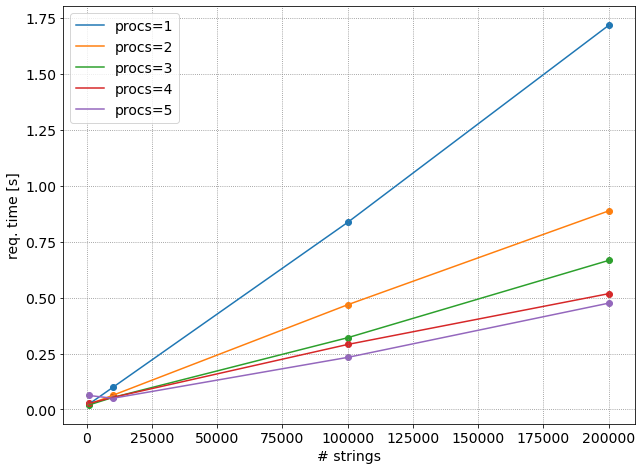

In [4]:
# import the multiprocessing module
import multiprocessing as mp
import numpy as np
import random
import string
import time

random.seed(123)

lock = mp.Lock()

def gen_rand_str(num_string, str_len, num_processes):

    # defines a queue to output the results of the processes running the function rand_string
    output = mp.Queue()

    # define a example function
    def rand_string(num, length, output):
        out = []
        for n in range(num):
            # Generates a random string of numbers, lower- and uppercase chars. """
            rand_str = ''.join(random.choice(
                                string.ascii_lowercase
                                + string.ascii_uppercase
                                + string.digits)
                           for i in range(length))
            out.append(rand_str)
        output.put(out)

    # create a list of processes to run
    # each process creates a list of x random strings of length y
    t1 = time.time()
    processes = [mp.Process(target=rand_string, args=(int(num_string/num_processes), str_len, output)) for x in range(num_processes)]

    # Run processes
    for p in processes:
        p.start()

    # Get process results from the output queue once they are done
    results = [output.get() for p in processes]
    dt = time.time()-t1
    
    print(str(np.round(dt,4))+" seconds elapsed, generated "+str(int(num_string/num_processes)*num_processes)+" strings with "+str(num_processes)+" processes.")
    return [results, dt]

print("Output example:")
print(gen_rand_str(40,16,1))
# if the same number of random strings is generated with multiple threads, it is slower due to the overhead
# but this only holds true for small numbers of strings
#gen_rand_str(10,16,4);

# runs a little benchmark:
# with increasing number of strings to be generated, the performance advantage becomes more obvious
# and the additonal overhead of using multiple processes becomes less important

str_len = 16
max_procs = 5
num_strings = [int(1E3),int(1E4),int(1E5),int(2E5)]
req_time = {}

for m in range(1, max_procs + 1):
    req_time.update({m:[]})
    for n in range(len(num_strings)):
        req_time[m].append(gen_rand_str(num_strings[n], str_len, m)[1])

from matplotlib import pyplot as plt       
fig = plt.figure(figsize=(1024/100,768/100))
ax = fig.add_subplot(111)
for n in range(1,max_procs + 1):
    ax.scatter(num_strings,req_time[n])
    ax.plot(num_strings,req_time[n],label="procs="+str(n))
ax.set_xlabel("# strings",fontsize=14)
ax.set_ylabel("req. time [s]",fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)
plt.grid(which="both",color="gray",linestyle=":")
plt.legend(fontsize=14)
plt.show()

#gen_rand_str(4000,16,1);
#gen_rand_str(1000,16,4);

<font size="3">
In this example, a number of processes is explicitly created for every job (working e.g. on a part of a big data array) having the disadvantage of a time and memory overhead (because independent copies of parts of the data in your RAM are created).<br><b>In case, you'd like to run a huge number of jobs, it would be impossible to create separate processes for each job.</b><br>
    
<b><i>Process</i> should be used only when you have a small number of jobs/tasks and smaller amounts of data, each only executed once, but each with a runtime much longer than the time required to spawn a new process. In particular for tasks with long-running IO-operations (e.g. reading/writing big files), <i>Process</i> should be used.</b><br>

In the contrary case, the usage of <i>Pool</i> being part of the builtin <i>multiprocessing</i> module in Python is indicated. As its name states, it provides a pool of workers or worker processes (usually the number of CPU cores in your system) <b>e.g. to compute the result of the same function for a big input argument array (data parallelism).</b> The distribution of the input data to the processes, handling of the individual processes and joining the results is done in the background.<br><br><b> But be careful if the result retrieval order of the workers is of importance for your application!</b>
<br><br> For further information on <i>Process</i> and <i>Pool</i>, see <a href="https://medium.com/@lih.verma/multi-processing-in-python-process-vs-pool-5caf0f67eb2b">here</a>. Depending on your amount of data and application, other packages would have a better performance and would be more suitable like <a href="https://github.com/ray-project/ray">Ray</a> or <a href="https://dask.org/">Dask</a>.<br><br>
<b>An example using <a href="https://docs.python.org/3/library/multiprocessing.html"><i>multiprocessing.Pool</i></a> is given:</b>
</font>

In [ ]:
import multiprocessing as mp
import numpy as np
import time

# function to be applied in parallel on parts of a data set / array
def parallel_function(x):
    return np.mean(x)

# usually the number of workers is chosen to be
# num_workers = mp.cpu_count() the number of available cores in the system
num_workers = 4

# for a clean implementation:
# check if script is run from main process
if __name__ == '__main__':
    # initializes a pool of workers apply the same function in parallel
    # on different parts of a data set (data parallelism)
    p = mp.Pool(num_workers)
    # mp.Pool takes care of how the data is distributed to the worker processes
    # as an example, we compute the mean of 10 arrays with 50x10^6 values each
    result = p.map(parallel_function, np.random.uniform(0,1,(10,int(50E6))))
    # map_async() allows asynchronous execution of the function with parts of the 
    # input data the order in which the result is returned, is not guaranteed, 
    # but it can be faster
    #
    # the method map_async() is non-blocking, hence the interpreter continues
    # the execution of the main program
    print(result)

<font size="3"><div class="alert alert-warning"><b>Exercise:</b> <br>Implement a parallelized generator for gaussian <a href="https://en.wikipedia.org/wiki/Random_walk">random walks</a> in $\mathbb{R}^2$, hence in the two dimensional plane. Benchmark your implementation by measuring the required time for a given number of walks with a maximum number of steps. Observe and plot how well your implementation scales with increasing number of processes / cpu cores. Plot the random walk(s) in two dimensions.<br><br>
<b>Hints: </b><br>
A random walk can be defined as follows:<br>
Let be $x_{0} \in \mathbb{R}^n$ a defined start position for the random walk and $s \sim \mathcal{N}\left(\mu,\sigma\right)$ the random normal-distributed step increment, then the recursion formula $x_{n+1} = x_{n} + s$ describes a gaussian random walk.<br><br>
In order to generate normal-distributed random values, use the numpy function <a href="https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html">np.random.normal</a>.<br><br>
Since you know in advance how many steps and how many random walks you'd like to generate, it is advised to allocate the required memory in advance to achieve better performance. <b>The use of numpy arrays over lists is encouraged.</b><br><br>
Start to experiment with small values for $\mu$ and $\sigma$.<br><br>
<b>Use <a href="https://docs.python.org/3/library/multiprocessing.html#multiprocessing.pool.Pool.starmap"><i>multiprocessing.starmap</i></b> </a>to use multiple input arguments for mapping function.
</div>

<b>Try it yourself:</b></font>

### Example Solution:

Using 1 worker:
4.026015758514404 seconds have passed generating 2000 walks with 1000 steps each.
Using 2 workers:
2.2239086627960205 seconds have passed generating 2000 walks with 1000 steps each.
Using 4 workers:
1.0891625881195068 seconds have passed generating 2000 walks with 1000 steps each.


NameError: name 'walks' is not defined

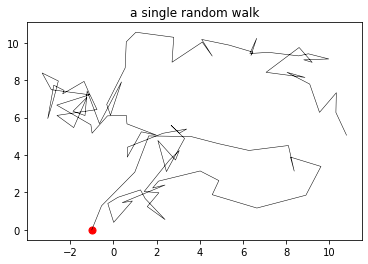

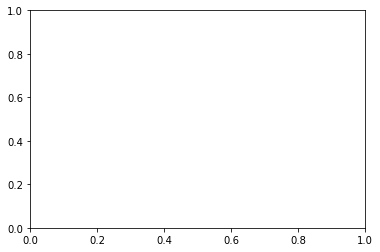

In [6]:
import multiprocessing as mp
import numpy as np
import time
from matplotlib import pyplot as plt
from itertools import repeat

def random_walk2D(num_steps=int(1E3), mu=1E-2, sigma=1E-2, start=np.array([0,0])):
    # create empty array with zeros to avoid using lists
    walk = np.zeros((num_steps,2))
    # generate random steps / increments
    steps = np.random.normal(mu, sigma, (num_steps,2))
    walk[0] = start
    # compute the steps of the walk
    for i in range(1,num_steps):
        walk[i] = walk[i-1] + steps[i]
    return walk

def measure_time(fn):
    def wrapper(*args, **kwargs):
        t1=time.time()
        res=fn(*args, **kwargs)
        dt=time.time()-t1
        print(str(dt)+" seconds have passed generating "+str(num_walks)+" walks with "+str(num_steps)+" steps each.")
        return res
    return wrapper

# using a decorator here to wrap around the function
@measure_time
def generate_walks(num_walks, num_workers, mu, sigma, num_steps, start):
    #prepare argument list
    arg_list = repeat((num_steps, mu, sigma, start),num_walks)
    # generates N random walks in parallel
    p = mp.Pool(num_workers)
    # start function asynchronously 
    results = [p.apply_async(random_walk2D, args) for args in arg_list]
    walks = np.array([p.get() for p in results])
    return walks

# plot a single random walk in the plane
res=random_walk2D(num_steps=100, mu=0.1, sigma=1, start=[-1,0])
fig=plt.figure()
ax=fig.add_subplot(111)
# plot the random walk
ax.plot(res[:,0],res[:,1],color="black",linewidth=.5)
# plot the start position
ax.scatter([-1],[0],color="red",s=50)
ax.set_title("a single random walk");

# set parameters for walks
mu = 1E-2
sigma = 1E-2
start = np.array([-1,0])
benchmark_result = []
num_steps = int(1E3)
num_walks = int(2E3)

# run a benchmark
# using 1 worker
print("Using 1 worker:")
generate_walks(num_walks,1,mu,sigma,num_steps,start)
# using 2 workers
print("Using 2 workers:")
generate_walks(num_walks,2,mu,sigma,num_steps,start)
# using 4 workers
print("Using 4 workers:")
generate_walks(num_walks,4,mu,sigma,num_steps,start)

# print some randomly selected walks
walks_2_print = 20
random_selection = np.random.randint(0,num_walks,size=(walks_2_print,))
fig2=plt.figure()
ax2=fig2.add_subplot(111)
# plot the random walk
for i in random_selection:
    ax2.plot(walks[i,:,0],walks[i,:,1],linewidth=.5)

### Lazy parallelization with joblib
<br>
<font size="3">
Depending on the application, an even easier way to parallelize your code (depending on what kind of parallelism is required) is to use the <a href="https://joblib.readthedocs.io/en/latest/"><i>joblib</i></a> package with which you can even build computing pipelines.<br><br>
    <b>But you may need to fine tune the parameters <i>n_jobs</i> and <i>batch_size</i> and be aware of the additional overhead in creating workers. The individual tasks should take longer than the required time to spawn a new worker (rule of thumb, much longer than 1 second). Otherwise using <i>multiprocessing.Pool</i> or <i>joblib</i> is slower compared to a sequential execution.</b><br><br>
To parallelize a part of the code, you just need to import the class <i>Parallel</i> and it expects (besides some additional parameters) a <i>generator</i> object, hence a <i>list comprehension</i> expression enclosed by round brackets. An example is shown below.
</font>

### Example:

In [ ]:
import numpy as np
import time
from joblib import Parallel, delayed

# the function to be called in the list comprehension / generator
def random_walk2D(num_steps=int(1E3), mu=1E-2, sigma=1E-2, start=np.array([0,0])):
    # create empty array with zeros to avoid using lists
    walk = np.zeros((num_steps,2))
    # generate random steps / increments
    steps = np.random.normal(mu, sigma, (num_steps,2))
    walk[0] = start
    # compute the steps of the walk
    for i in range(1,num_steps):
        walk[i] = walk[i-1] + steps[i]
    return walk

num_walks=int(1E4)
t1=time.time()
# use just do everything in the generator in one job (sequential execution)
Parallel(n_jobs=1)(delayed(random_walk2D)(num_steps=int(1E3)) for _ in range(num_walks))
dt=time.time()-t1
print(str(np.round(dt,4)) + " seconds elapsed.")

num_walks=int(1E4)
t1=time.time()
# divide the task (calling the function above %num_walks times) into two jobs running in parallel
# resulting in nearly half of the time required
result = Parallel(n_jobs=2)(delayed(random_walk2D)(num_steps=int(1E3)) for _ in range(num_walks))
dt=time.time()-t1
print(str(np.round(dt,4)) + " seconds elapsed.")

num_walks=int(1E4)
t1=time.time()
# divide the task into four jobs running in parallel, scaling is not optimal, probably problem size to small
# for more than two jobs
result = Parallel(n_jobs=3)(delayed(random_walk2D)(num_steps=int(1E3)) for _ in range(num_walks))
dt=time.time()-t1
print(str(np.round(dt,4)) + " seconds elapsed.")

num_walks=int(1E4)
t1=time.time()
# divide the task into four jobs running in parallel, scaling is not optimal, probably problem size to small
# for more than two jobs
result = Parallel(n_jobs=4)(delayed(random_walk2D)(num_steps=int(1E3)) for _ in range(num_walks))
dt=time.time()-t1
print(str(np.round(dt,4)) + " seconds elapsed.")

<hr style="border:1px solid gray"> </hr>

## Reminder of Jupyter Keyboard Shortcuts
<br>
   
    
| Shortcut | Function |
| -------- | ----------- |
| Esc      | Switch to command mode |
| Enter    | Switch to edit mode |
| B        | Creates new empty cell **B**elow |
| H        | Show **H**elp   |
| X        | Deletes currently selected cell|
| Shift + Enter | Run cell and advance to next cell |
| Ctrl  + Enter | Run cell |
| Ctrl  + S     | Save notebook |
    <font size="3">As an example, random walks in two dimensions were generated. The runtime scales with increasing number of workers, but not linearily if we use more than three, since the problem size is probably too small.</font>